<a id="1"></a>
# Importing Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# importing the training set
data_train = pd.read_csv("Google_Stock_Price_Train.csv")
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
train = data_train.loc[:,["Open"]].values
print(train)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [ ]:
# Feature Scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

train_scaled = scaler.fit_transform(train)
print(train_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [ ]:
# create a data structure with 50 timesteps and 1 output
x_train = []
y_train = []
timesteps = 5

for i in range(timesteps, 1258):
    x_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshaping

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train)
print(y_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]
  [0.0585423 ]]

 ...

 [[0.96294367]
  [0.96123223]
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.96123223]
  [0.95475854]
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.95475854]
  [0.95204256]
  [0.95163331]
  [0.95725128]
  [0.93796041]]]
[0.0643277  0.0585423  0.06568569 ... 0.95725128 0.93796041 0.93688146]


<a id="2"></a>
# Create RNN Model

In [ ]:
# Create RNN Model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

regressor = Sequential()

# adding the first RNN layer and some Dropout regularisation 
regressor.add(SimpleRNN(units = 100, activation="relu", return_sequences=True ,input_shape = (x_train.shape[1], 1)))

# adding the second RNN layer and some Dropout regularisation 
regressor.add(SimpleRNN(units = 100, activation="relu", return_sequences=True))

# adding the third RNN layer and some Dropout regularisation 
regressor.add(SimpleRNN(units = 100 , activation="relu", return_sequences=True))

# adding the fourth RNN layer and some Dropout regularisation 
regressor.add(SimpleRNN(units = 100))

# Adding thw output Layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer= "adam", loss = "mean_squared_error")

# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs = 100, batch_size = 1)

2023-05-17 10:43:53.673893: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 10:43:59.642384: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
1253/1253 [==============================] - 8s 4ms/step - loss: 0.0027
Epoch 2/100
1253/1253 [==============================] - 6s 4ms/step - loss: 0.0014
Epoch 3/100
1253/1253 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 4/100
1253/1253 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 5/100
1253/1253 [==============================] - 6s 5ms/step - loss: 8.3597e-04
Epoch 6/100
1253/1253 [==============================] - 6s 5ms/step - loss: 9.1380e-04
Epoch 7/100
1253/1253 [==============================] - 6s 5ms/step - loss: 9.9316e-04
Epoch 8/100
1253/1253 [==============================] - 6s 5ms/step - loss: 7.8209e-04
Epoch 9/100
1253/1253 [==============================] - 7s 5ms/step - loss: 7.5230e-04
Epoch 10/100
1253/1253 [==============================] - 8s 6ms/step - loss: 6.5817e-04
Epoch 11/100
1253/1253 [==============================] - 6s 5ms/step - loss: 6.7978e-04
Epoch 12/100
1253/1253 [======================

1253/1253 [==============================] - 6s 5ms/step - loss: 3.6304e-04
Epoch 93/100
1253/1253 [==============================] - 8s 7ms/step - loss: 3.7188e-04
Epoch 94/100
1253/1253 [==============================] - 10s 8ms/step - loss: 3.2493e-04
Epoch 95/100
1253/1253 [==============================] - 8s 7ms/step - loss: 3.5997e-04
Epoch 96/100
1253/1253 [==============================] - 7s 6ms/step - loss: 3.8112e-04
Epoch 97/100
1253/1253 [==============================] - 7s 5ms/step - loss: 3.4359e-04
Epoch 98/100
1253/1253 [==============================] - 6s 5ms/step - loss: 3.4908e-04
Epoch 99/100
1253/1253 [==============================] - 6s 4ms/step - loss: 3.5875e-04
Epoch 100/100
1253/1253 [==============================] - 6s 5ms/step - loss: 3.5370e-04


In [ ]:
# Getting the real stock price of 2017

data_test = pd.read_csv("Google_Stock_Price_Test.csv")
data_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
real_stock_price = data_test.loc[:, ["Open"]].values
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [ ]:
# Getting the predicted stock price of 2017
data_total = pd.concat((data_train["Open"], data_test["Open"]), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs) # min max scaler
inputs

array([[0.95204256],
       [0.95163331],
       [0.95725128],
       [0.93796041],
       [0.93688146],
       [0.92955205],
       [0.94731751],
       [0.94307612],
       [0.96015329],
       [0.98087655],
       [0.98359253],
       [0.97827219],
       [0.98225314],
       [0.98288563],
       [0.98214153],
       [0.979779  ],
       [0.97849542],
       [0.98182528],
       [0.98245777],
       [1.01045465],
       [1.02407173],
       [1.03930724],
       [1.03354044],
       [0.99624228],
       [0.9631297 ]])

1/1 [==============================] - 0s 30ms/step


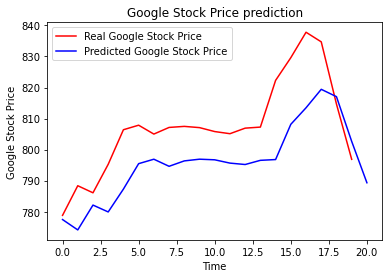

In [ ]:
x_test = []
for i in range(timesteps, 70):
    if len(inputs[i-timesteps:i, 0]) == timesteps:
        x_test.append(inputs[i-timesteps:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicte_stock_price = regressor.predict(x_test)
predicte_stock_price = scaler.inverse_transform(predicte_stock_price)

# visualising the results
plt.plot(real_stock_price, color = "red", label = "Real Google Stock Price")
plt.plot(predicte_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

In [ ]:
print(predicte_stock_price)

[[777.4594 ]
 [774.1209 ]
 [782.1237 ]
 [779.91174]
 [787.2772 ]
 [795.4675 ]
 [796.9016 ]
 [794.6185 ]
 [796.3575 ]
 [796.9082 ]
 [796.7103 ]
 [795.64575]
 [795.19244]
 [796.5408 ]
 [796.79016]
 [808.1483 ]
 [813.47034]
 [819.42145]
 [817.05255]
 [802.64355]
 [789.3163 ]]
